# Libraries

In [1301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, \
                            IsolationForest, StackingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

# Setup

In [1155]:
pd.set_option('display.max_rows', 50)

# Pseudolabelling

In [1256]:
d = data_train.copy()
pl_= pd.read_csv('./pl/dataset.csv')
pl_.drop(['PassengerId'], axis=1, inplace=True)

data_train_ext = pd.concat([d, pl_])
data_train_ext.head()

/Users/educauchy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Age_Bins,Cabin_Letter_Enc,Family_Members,Fare,Fare_Log,Gender,Is_Alone,Origin,Parch,Pclass,SibSp,Surname_Enc,Survived
1,45.0,3,8.0,0.0,13.35,3.738768,1.0,1,2.0,0.0,3.0,0.0,3063.0,0
3,19.0,2,8.0,0.0,13.04,3.704872,1.0,1,2.0,0.0,3.0,0.0,12742.0,0
4,25.0,2,8.0,0.0,7.76,2.956057,1.0,1,2.0,0.0,3.0,0.0,2335.0,1
5,35.0,3,8.0,0.0,6.71,2.746313,1.0,1,2.0,0.0,2.0,0.0,20885.0,0
6,7.0,1,8.0,0.0,9.77,3.288359,1.0,1,2.0,0.0,3.0,0.0,4730.0,0


In [1259]:
X = data_train_ext[data_train_ext.columns[~data_train_ext.columns.isin(['Survived'])]]
y = data_train_ext['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', \
                            random_state=78, oob_score=True, n_jobs=-1).fit(X_train, y_train)

print(clf.score(X_test, y_test))
print(pd.DataFrame(np.array(list(zip(cols, np.round(clf.feature_importances_, 3)))), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False))


0.8441029682164434
             Feature Importance
4     Family_Members       0.15
5               Fare       0.15
12          Age_Bins      0.142
6             Gender      0.119
0             Pclass      0.107
8        Surname_Enc      0.081
2              SibSp      0.074
3              Parch      0.047
10          Is_Alone      0.044
11          Fare_Log      0.025
9             Origin      0.022
1                Age      0.021
7   Cabin_Letter_Enc      0.018


In [1262]:
test_data_test['Survived'] = clf.predict(test_data_test[cols]).astype(int)
test_data_test['PassengerId'] = test_data['PassengerId'].astype(int)
out = test_data_test[['PassengerId', 'Survived']]
out.sort_values(by=['PassengerId'], inplace=True)
out.to_csv('./submissions/AutoLabel_RF_kNNImpute_IsoForest.csv', index = False)


/Users/educauchy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Load data

In [1266]:
data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [1267]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,100000.000000,100000.000000,100000.000000,100000,100000,96708.000000,100000.000000,100000.000000,95377,99866.00000,32134,99750
unique,NaN,NaN,NaN,92144,2,NaN,NaN,NaN,75331,NaN,26992,3
top,NaN,NaN,NaN,"Johnson, John",male,NaN,NaN,NaN,A/5,NaN,C19828,S
freq,NaN,NaN,NaN,31,56114,NaN,NaN,NaN,602,NaN,6,72139
mean,49999.500000,0.427740,2.106910,NaN,NaN,38.355472,0.397690,0.454560,NaN,43.92933,NaN,NaN
std,28867.657797,0.494753,0.837727,NaN,NaN,18.313556,0.862566,0.950076,NaN,69.58882,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,0.080000,0.000000,0.000000,NaN,0.68000,NaN,NaN
25%,24999.750000,0.000000,1.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,10.04000,NaN,NaN
50%,49999.500000,0.000000,2.000000,NaN,NaN,39.000000,0.000000,0.000000,NaN,24.46000,NaN,NaN
75%,74999.250000,1.000000,3.000000,NaN,NaN,53.000000,1.000000,1.000000,NaN,33.50000,NaN,NaN


## Description of the attributes

* PassengerId - Unique passenger id
* Survived - Flag whether passenger survived or not
* Pclass - Ticket class
* Name - Name of the passenger
* Sex - Gender of the passenger
* Age - Age of the passenger
* SibSp - # of siblings / spouses aboard the Titanic:
    * Siblings: brother, sister, stepbrother, stepsister
    * Spouse: husband, wife (mistresses and fiancés were ignored)
* Parch - # of parents / children aboard the Titanic:
    * Parent: mother, father
    * Child: daughter, son, stepdaughter, stepson
* Ticket - Ticket number
* Fare - Passenger fare
* Cabin - Cabin number
* Embarked - Port of embarkation:
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

## Null values

In [1268]:
data.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

## Unique values

In [1269]:
data.nunique()

PassengerId    100000
Survived            2
Pclass              3
Name            92144
Sex                 2
Age               173
SibSp               7
Parch               8
Ticket          75331
Fare            15935
Cabin           26992
Embarked            3
dtype: int64

## Variable encoding

### Sex -> Gender

In [1270]:
sex_encoder = LabelEncoder()
sex_encoder.fit(data[['Sex']])
data['Gender'] = sex_encoder.transform(data[['Sex']])
# data.drop(['Sex'], axis=1, inplace=True)
data.head()

/Users/educauchy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,1
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,1
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,1
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,1
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,1


### Embarked -> Origin

In [1271]:
emb_encoder = LabelEncoder()
emb_encoder.fit(data[['Embarked']].astype(str))
data['Origin'] = emb_encoder.transform(data[['Embarked']].astype(str))
data['Origin'] = data['Origin'].replace('nan', np.nan)
# data.drop(['Embarked'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Origin
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,1,2
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,1,2
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,1,2
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,1,2
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,1,2


# Feature Engineering

### Count number of all family members

In [1272]:
data['Family_Members'] = data['SibSp'] + data['Parch']

### Separate Name into Surname and Firstname

In [1273]:
data[['Surname', 'Firstname']] = data.Name.str.split(", ", expand=True)
# data.drop(['Name', 'Firstname'], axis=1, inplace=True)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Origin,Family_Members,Surname,Firstname
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,1,2,2,Oconnor,Frankie
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,1,2,0,Bryan,Drew
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,1,2,3,Owens,Kenneth
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,1,2,0,Kramer,James
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,1,2,0,Bond,Michael


In [1274]:
test_data[['Surname', 'Firstname']] = test_data.Name.str.split(", ", expand=True)
# test_data.drop(['Name', 'Firstname'], axis=1, inplace=True)
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Firstname
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S,Holliday,Daniel
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S,Nguyen,Lorraine
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C,Harris,Heather
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S,Larsen,Eric
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C,Cleary,Sarah


### Separate Cabin into Letter and Number

In [1275]:
data['Cabin_Letter'] = data.Cabin.str.slice(0, 1)
data['Cabin_Number'] = data.Cabin.str.slice(1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Origin,Family_Members,Surname,Firstname,Cabin_Letter,Cabin_Number
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,1,2,2,Oconnor,Frankie,C,12239
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,1,2,0,Bryan,Drew,NaN,NaN
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,1,2,3,Owens,Kenneth,NaN,NaN
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,1,2,0,Kramer,James,NaN,NaN
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,1,2,0,Bond,Michael,NaN,NaN


## Variable encoding (2)

### Cabin_Letter -> Cabin_Letter_Enc

In [1276]:
cabin_encoder = LabelEncoder()
cabin_encoder.fit(data[['Cabin_Letter']].astype(str))
data['Cabin_Letter_Enc'] = cabin_encoder.transform(data[['Cabin_Letter']].astype(str))
data['Cabin_Letter_Enc'] = data['Cabin_Letter_Enc'].replace('nan', np.nan)
# data.drop(['Cabin_Letter'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Origin,Family_Members,Surname,Firstname,Cabin_Letter,Cabin_Number,Cabin_Letter_Enc
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,1,2,2,Oconnor,Frankie,C,12239,2
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,1,2,0,Bryan,Drew,NaN,NaN,8
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,1,2,3,Owens,Kenneth,NaN,NaN,8
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,1,2,0,Kramer,James,NaN,NaN,8
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,1,2,0,Bond,Michael,NaN,NaN,8


### Surname -> Surname_Enc

In [1277]:
surname_encoder = LabelEncoder()
surname_encoder.fit((data[['Surname']].append(test_data[['Surname']], ignore_index=True)).astype(str))
data['Surname_Enc'] = surname_encoder.transform(data[['Surname']].astype(str))
data['Surname_Enc'] = data['Surname_Enc'].replace('nan', np.nan)
# data.drop(['Surname'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Gender,Origin,Family_Members,Surname,Firstname,Cabin_Letter,Cabin_Number,Cabin_Letter_Enc,Surname_Enc
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,...,S,1,2,2,Oconnor,Frankie,C,12239,2,17441
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,...,S,1,2,0,Bryan,Drew,NaN,NaN,8,3063
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,...,S,1,2,3,Owens,Kenneth,NaN,NaN,8,17798
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,...,S,1,2,0,Kramer,James,NaN,NaN,8,12742
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,...,S,1,2,0,Bond,Michael,NaN,NaN,8,2335


# Imputation

In [1284]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', \
        'Family_Members', 'Fare', 'Gender', 'Cabin_Letter_Enc', 'Surname_Enc', 'Origin']

knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(data[cols])
data_imputed = knn_imputer.transform(data[cols])

# iter_imputer = IterativeImputer(n_nearest_features=2)
# iter_imputer.fit(data[cols])
# data_imputed = iter_imputer.transform(data[cols])

data_train = pd.DataFrame(data = data_imputed, columns = cols)
data_train['Survived'] = data['Survived']

data_train.shape

(100000, 11)

# Anomaly Detection

In [1285]:
clf_anomaly = IsolationForest(n_estimators=500, n_jobs=-1).fit(data_train)
pred_anomaly = clf_anomaly.predict(data_train)
data_train = data_train[pred_anomaly == 1]
data_train.shape

(62902, 11)

# Feature Engineering (2)

In [1286]:
data_train['Family_Members'] = data_train['SibSp'] + data_train['Parch']
data_train['Fare_Log'] = np.log2(data_train['Fare'])
data_train['Is_Alone'] = np.where(data_train['Family_Members'] == 0, 1, 0)
data_train['Age_Bins'] = np.where(data_train['Age'] <= 18, 1, 
                                 np.where(data_train['Age'] <= 30, 2,
                                 np.where(data_train['Age'] <= 45, 3,
                                 np.where(data_train['Age'] <= 60, 4,
                                 np.where(data_train['Age'] <= 80, 5, 6)))))
data_train['Age'] = StandardScaler().fit_transform(data_train[['Age']])
data_train['Fare'] = StandardScaler().fit_transform(data_train[['Fare']])
cols.extend(['Is_Alone', 'Fare_Log', 'Age_Bins'])

In [1287]:
data_train.head()

,Pclass,Age,SibSp,Parch,Family_Members,Fare,Gender,Cabin_Letter_Enc,Surname_Enc,Origin,Survived,Fare_Log,Is_Alone,Age_Bins
1,3.0,0.412242,0.0,0.0,0.0,-0.321718,1.0,8.0,3063.0,2.0,0,3.738768,1,3
3,3.0,-1.181023,0.0,0.0,0.0,-0.332145,1.0,8.0,12742.0,2.0,0,3.704872,1,2
4,3.0,-0.813347,0.0,0.0,0.0,-0.509740,1.0,8.0,2335.0,2.0,1,2.956057,1,2
5,2.0,-0.200552,0.0,0.0,0.0,-0.545057,1.0,8.0,20885.0,2.0,0,2.746313,1,3
6,3.0,-1.916377,0.0,0.0,0.0,-0.442133,1.0,8.0,4730.0,2.0,0,3.288359,1,1


In [1218]:
# N = 10000 # number of obs. to plot
# df_subset = data_train.loc[:N, cols].copy()
# data_subset = data_train.loc[:N, cols].copy()

# tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=250)
# tsne_results = tsne.fit_transform(data_subset)
# df_subset['tsne-2d-one'] = tsne_results[:,0]
# df_subset['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue="Pclass",
#     palette=sns.color_palette("hls", 3),
#     data=df_subset,
#     legend="full",
#     alpha=0.5
# )

# Model

In [1289]:
X = data_train[data_train.columns[~data_train.columns.isin(['Survived'])]]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', \
                            random_state=78, oob_score=True, n_jobs=-1).fit(X_train, y_train)

# clf = AdaBoostClassifier(n_estimators=1000).fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(pd.DataFrame(np.array(list(zip(cols, np.round(clf.feature_importances_, 3)))), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False))


0.830458628089977
             Feature Importance
6             Gender      0.259
8        Surname_Enc      0.152
5               Fare      0.147
10          Is_Alone      0.147
1                Age      0.097
9             Origin       0.08
0             Pclass      0.052
7   Cabin_Letter_Enc      0.031
12          Age_Bins      0.015
2              SibSp      0.005
3              Parch      0.005
4     Family_Members      0.005
11          Fare_Log      0.002


In [1302]:
# %%capture --no-stderr
X = data_train[data_train.columns[~data_train.columns.isin(['Survived'])]]
y = data_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

estimators = [
            ('tree', DecisionTreeClassifier()),
            ('logreg', LogisticRegression()),
            ('svc', SVC())
]
clf = StackingClassifier(
        estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=2000)
).fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/educauchy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/educauchy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

### XGBOOST

In [1172]:
# dtrain = xgb.DMatrix(X, label=y)
# dtest = xgb.DMatrix(test_data_test[data_train.columns[~data_train.columns.isin(['Survived', 'PassengerId'])]])
# param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
# num_round = 3
# bst = xgb.train(param, dtrain, num_round)
# preds = bst.predict(dtest)

## Model Accuracy

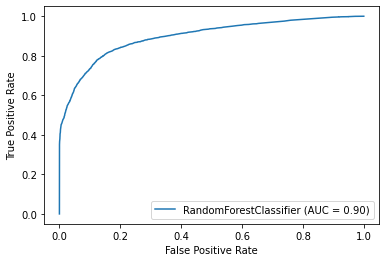

In [1220]:
plot_roc_curve(clf, X_test, y_test)

# Predict test

In [1221]:
test_data['Gender'] = sex_encoder.transform(test_data[['Sex']])
# test_data.drop(['Sex'], axis=1, inplace=True)
test_data.head()

/Users/educauchy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Firstname,Gender
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S,Holliday,Daniel,1
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S,Nguyen,Lorraine,0
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C,Harris,Heather,0
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S,Larsen,Eric,1
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C,Cleary,Sarah,0


In [1222]:
test_data['Origin'] = emb_encoder.transform(test_data[['Embarked']].astype(str))
test_data['Origin'] = test_data['Origin'].replace('nan', np.nan)
# test_data.drop(['Embarked'], axis=1, inplace=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Firstname,Gender,Origin
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S,Holliday,Daniel,1,2
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S,Nguyen,Lorraine,0,2
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C,Harris,Heather,0,0
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S,Larsen,Eric,1,2
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C,Cleary,Sarah,0,0


In [1223]:
test_data['Family_Members'] = test_data['SibSp'] + test_data['Parch']

In [1224]:
test_data['Cabin_Letter'] = test_data.Cabin.str.slice(0, 1)
test_data['Cabin_Number'] = test_data.Cabin.str.slice(1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Firstname,Gender,Origin,Family_Members,Cabin_Letter,Cabin_Number
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S,Holliday,Daniel,1,2,0,NaN,NaN
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S,Nguyen,Lorraine,0,2,0,NaN,NaN
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C,Harris,Heather,0,0,0,B,15315
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S,Larsen,Eric,1,2,0,NaN,NaN
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C,Cleary,Sarah,0,0,2,B,22515


In [1225]:
test_data['Cabin_Letter_Enc'] = cabin_encoder.transform(test_data[['Cabin_Letter']].astype(str))
test_data['Cabin_Letter_Enc'] = test_data['Cabin_Letter_Enc'].replace('nan', np.nan)
# test_data.drop(['Cabin_Letter'], axis=1, inplace=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Firstname,Gender,Origin,Family_Members,Cabin_Letter,Cabin_Number,Cabin_Letter_Enc
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S,Holliday,Daniel,1,2,0,NaN,NaN,8
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S,Nguyen,Lorraine,0,2,0,NaN,NaN,8
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C,Harris,Heather,0,0,0,B,15315,1
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S,Larsen,Eric,1,2,0,NaN,NaN,8
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C,Cleary,Sarah,0,0,2,B,22515,1


In [1226]:
test_data['Surname_Enc'] = surname_encoder.transform(test_data[['Surname']].astype(str))
test_data['Surname_Enc'] = test_data['Surname_Enc'].replace('nan', np.nan)
# test_data.drop(['Surname'], axis=1, inplace=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Firstname,Gender,Origin,Family_Members,Cabin_Letter,Cabin_Number,Cabin_Letter_Enc,Surname_Enc
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S,Holliday,Daniel,1,2,0,NaN,NaN,8,10830
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S,Nguyen,Lorraine,0,2,0,NaN,NaN,8,17134
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C,Harris,Heather,0,0,0,B,15315,1,9978
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S,Larsen,Eric,1,2,0,NaN,NaN,8,13303
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C,Cleary,Sarah,0,0,2,B,22515,1,4406


In [1227]:
imp_cols = ['Pclass', 'Age', 'SibSp', 'Parch', \
        'Family_Members', 'Fare', 'Gender', 'Cabin_Letter_Enc', 'Surname_Enc', 'Origin']

test_data_imputed = knn_imputer.transform(test_data[imp_cols])
test_data_test = pd.DataFrame(data = test_data_imputed, columns = imp_cols)
test_data_test.head()

,Pclass,Age,SibSp,Parch,Family_Members,Fare,Gender,Cabin_Letter_Enc,Surname_Enc,Origin
0,3.0,19.0,0.0,0.0,0.0,63.01,1.0,8.0,10830.0,2.0
1,3.0,53.0,0.0,0.0,0.0,5.81,0.0,8.0,17134.0,2.0
2,1.0,19.0,0.0,0.0,0.0,38.91,0.0,1.0,9978.0,0.0
3,2.0,25.0,0.0,0.0,0.0,12.93,1.0,8.0,13303.0,2.0
4,1.0,17.0,0.0,2.0,2.0,26.89,0.0,1.0,4406.0,0.0


In [1228]:
test_data_test['Family_Members'] = test_data_test['SibSp'] + test_data_test['Parch']
test_data_test['Fare_Log'] = np.log2(test_data_test['Fare'])
test_data_test['Is_Alone'] = np.where(test_data_test['Family_Members'] == 0, 1, 0)
test_data_test['Age_Bins'] = np.where(test_data_test['Age'] <= 18, 1, 
                                 np.where(test_data_test['Age'] <= 30, 2,
                                 np.where(test_data_test['Age'] <= 45, 3,
                                 np.where(test_data_test['Age'] <= 60, 4,
                                 np.where(test_data_test['Age'] <= 80, 5, 6)))))

In [1229]:
test_data_test['Survived'] = clf.predict(test_data_test[cols]).astype(int)
test_data_test['PassengerId'] = test_data['PassengerId'].astype(int)
test_data_test[['PassengerId', 'Survived']].head()

,PassengerId,Survived
0,100000,0
1,100001,1
2,100002,1
3,100003,0
4,100004,1


## Save predictions

In [1183]:
# test_data_test[['PassengerId', 'Survived']].to_csv('./submissions/RF_kNNImpute_IsoForest.csv', index = False)


In [1199]:
# test_data_test['Survived'] = clf.predict(test_data_test[cols]).astype(int)
# test_data_test['PassengerId'] = test_data['PassengerId'].astype(int)
# test_data_test[['PassengerId', 'Survived']].to_csv('./submissions/AdaBoost_autoimpute_noanomaly.csv', index = False)
# test_data_test[['PassengerId', 'Survived']].head()

# Save data for pseudolabelling

In [1244]:
test_data_test['Survived_Score'] = clf.predict_proba(test_data_test[cols])[:, 0]
test_data_test['PassengerId'] = test_data['PassengerId'].astype(int)

test_data_test.sort_values(by=['Survived_Score'], inplace=True)
test_data_test_size = test_data_test.shape[0]
pl = pd.concat([test_data_test.iloc[:int(round(test_data_test_size*0.2, 0))],
                test_data_test.iloc[int(round(test_data_test_size*0.8, 0)):]
               ])
pl['Survived'] = np.round(pl['Survived_Score'], 0)
pl['Survived'] = pl['Survived'].astype(int)
pl.sort_values(by=['PassengerId'], inplace=True)
pl.drop(['Survived_Score'], axis=1, inplace=True)
pl.to_csv('./pl/dataset.csv', index = False)